# ParallelBNs: Experimentos fges

In [189]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (25,10)

## Initial Configuration of Dataframes

In [138]:
# Files
file_fges = './../results/fGES/global_results/results_fges.csv'
file_pges = './../results/results-19-5-22.csv'
file_cges = './results-circular-galgo-13-10.csv' 

# Loading dfs
df_fges = pd.read_csv(file_fges)
df_pges = pd.read_csv(file_pges)
df_cges = pd.read_csv(file_cges)

In [139]:
# Preprocessing df_pges
df_pges['threads'] = pd.Categorical(df_pges.threads)
df_pges.drop(['seed','LL Score'], axis=1, inplace=True)

# Preprocessing df_cges
df_cges['threads'] = pd.Categorical(df_cges.threads)
df_cges.drop(['seed','LL Score'], axis=1, inplace=True)


In [140]:
# Joining dataframes
df = pd.concat([df_pges, df_cges, df_fges])
df.reset_index(drop=True,inplace=True)
#df

In [141]:
# Replacing values in bbdd column
df["bbdd"] = df.bbdd.str.replace(r'^\w+',r'')
df["bbdd"] = df.bbdd.str.replace(r'.csv',r'')
#df["bbdd"].unique()

In [142]:
le = LabelEncoder()
df["bbdd"] = le.fit_transform(df["bbdd"])

In [190]:
# Replacing values of threads for later comparison
df["threads"] = df["threads"].fillna(0)

# Medias de tiempo de ejecución

In [154]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

## PGES

In [143]:
df_unstack = df_pges.drop([ "bbdd", "interleaving", "SHD", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network","algorithm", "threads"]).mean().unstack(0)

Total time(s)                                   \
network                        alarm        andes    barley    cancer   
algorithm      threads                                                  
GES_BNBuilder  1            6.785727  1507.229636  9.631636  0.316909   
               2                 NaN          NaN       NaN       NaN   
               4                 NaN          NaN       NaN       NaN   
               6                 NaN          NaN       NaN       NaN   
               8                 NaN          NaN       NaN       NaN   
PGESwithStages 1                 NaN          NaN       NaN       NaN   
               2            6.056436   709.798767  7.241468  0.308522   
               4            4.697395   347.411636  5.415795  0.300899   
               6            5.031595   306.638052  5.841997  0.312432   
               8            5.436491   337.150260  5.846206  0.324121   

                                                                             \
network                    child earthquake hailfinder     hepar2 insurance   
algorithm      threads                                                        
GES_BNBuilder  1        1.970909   0.337091  20.984818  22.496636  4.121455   
               2             NaN        NaN        NaN        NaN       NaN   
               4             NaN        NaN        NaN        NaN       NaN   
               6             NaN        NaN        NaN        NaN       NaN   
               8             NaN        NaN        NaN        NaN       NaN   
PGESwithStages 1             NaN        NaN        NaN        NaN       NaN   
               2        1.767871   0.331052  13.498578  15.698060  3.878249   
               4        1.612125   0.325458   9.047799   9.834943  3.428512   
               6        1.760129   0.328292   8.586310   9.021229  3.651886   
               8        1.818975   0.343927   9.240657   9.639195  4.173379   

                                                                            \
network                         link    mildew         munin          pigs   
algorithm      threads                                                       
GES_BNBuilder  1        32906.655000  3.420273           NaN  26745.446000   
               2                 NaN       NaN           NaN           NaN   
               4                 NaN       NaN           NaN           NaN   
               6                 NaN       NaN           NaN           NaN   
               8                 NaN       NaN           NaN           NaN   
PGESwithStages 1                 NaN       NaN           NaN           NaN   
               2        12034.598000  2.500182           NaN  11415.393458   
               4         6514.598000  1.842561           NaN   5156.145952   
               6         4653.817000  1.783830           NaN   4288.880785   
               8         3863.539867  1.828805  42128.062857   4234.856837   

                                             
network                    water   win95pts  
algorithm      threads                       
GES_BNBuilder  1        3.066727  72.088000  
               2             NaN        NaN  
               4             NaN        NaN  
               6             NaN        NaN  
               8             NaN        NaN  
PGESwithStages 1             NaN        NaN  
               2        2.422132  51.006096  
               4        1.864987  34.028605  
               6        1.828217  32.868705  
               8        1.942945  36.201255

## CGES

In [145]:
df_unstack = df_cges.drop([ "bbdd", "interleaving", "SHD", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network","algorithm", "threads"]).mean().unstack(0)

Total time(s)                                    \
network                      alarm        andes     barley    cancer   
algorithm    threads                                                   
circular_ges 0                 NaN          NaN        NaN       NaN   
             2            8.145423  1688.730095  14.083634  0.425338   
             4            8.058972   749.082800   7.730873  0.463859   
             6           12.827635   944.252813  13.310378       NaN   
             8           10.580429   593.766716  10.003130       NaN   
             16          16.308200   640.306000  13.901000       NaN   
ges          0            7.563000  4683.362700  10.876700  0.278200   
             2                 NaN          NaN        NaN       NaN   
             4                 NaN          NaN        NaN       NaN   
             6                 NaN          NaN        NaN       NaN   
             8                 NaN          NaN        NaN       NaN   
             16                NaN          NaN        NaN       NaN   

                                                                            \
network                  child earthquake hailfinder     hepar2  insurance   
algorithm    threads                                                         
circular_ges 0             NaN        NaN        NaN        NaN        NaN   
             2        3.174211   0.489901  24.721514  20.750192   5.640973   
             4        3.767029   0.519543  19.785829  14.343800   6.161174   
             6        5.740365        NaN  33.130213  23.308066  10.406934   
             8        4.808208        NaN  28.622740  18.335623   7.917974   
             16       6.521000        NaN  42.812800  24.961000   9.965600   
ges          0        1.615000   0.280500  28.221500  24.179800   3.453800   
             2             NaN        NaN        NaN        NaN        NaN   
             4             NaN        NaN        NaN        NaN        NaN   
             6             NaN        NaN        NaN        NaN        NaN   
             8             NaN        NaN        NaN        NaN        NaN   
             16            NaN        NaN        NaN        NaN        NaN   

                                                                      \
network                       link    mildew          pigs     water   
algorithm    threads                                                   
circular_ges 0                 NaN       NaN           NaN       NaN   
             2        36083.395139  4.279622  30217.665018  3.691824   
             4        14511.474877  4.075900  13059.602559  3.660471   
             6        17923.950226  4.494882  16403.724971  5.408697   
             8         9908.895725  3.280143   9155.516310  4.438896   
             16                NaN  3.565500           NaN  5.126200   
ges          0                 NaN  2.908364           NaN  2.626818   
             2                 NaN       NaN           NaN       NaN   
             4                 NaN       NaN           NaN       NaN   
             6                 NaN       NaN           NaN       NaN   
             8                 NaN       NaN           NaN       NaN   
             16                NaN       NaN           NaN       NaN   

                                  
network                 win95pts  
algorithm    threads              
circular_ges 0               NaN  
             2         90.090257  
             4         59.938746  
             6        105.470014  
             8         74.529521  
             16        98.302250  
ges          0        106.000800  
             2               NaN  
             4               NaN  
             6               NaN  
             8               NaN  
             16              NaN

## fGES

In [147]:
df_unstack = df_fges.drop([ "bbdd", "SHD", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus"], axis=1)
df_unstack.groupby(["algorithm","network"]).mean().unstack(0)

,Total time(s)
algorithm,fges
network,
alarm,0.982727
andes,8.930636
barley,5.938909
child,3.908909
earthquake,0.009455
hailfinder,1057.691727
hepar2,1.087455
insurance,0.670545


# Medias del BDeu Score

## PGES

In [148]:
df_unstack = df_pges.drop([ "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["algorithm", "network", "threads"]).mean().unstack(0)

BDeu Score               
algorithm        GES_BNBuilder PGESwithStages
network  threads                             
alarm    1       -57226.453959            NaN
         2                 NaN  -57052.243509
         4                 NaN  -57174.682895
         6                 NaN  -57158.303854
         8                 NaN  -57253.463591
...                        ...            ...
win95pts 1       -49909.116437            NaN
         2                 NaN  -49775.871741
         4                 NaN  -49864.417343
         6                 NaN  -49885.838979
         8                 NaN  -49918.459775

[75 rows x 2 columns]

## CGES

In [150]:
df_unstack = df_cges.drop([ "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network","algorithm", "threads"]).mean().unstack(0)

BDeu Score                                \
network                      alarm          andes         barley   
algorithm    threads                                               
circular_ges 0                 NaN            NaN            NaN   
             2       -57118.076763 -475811.693120 -319223.587371   
             4       -56950.853963 -475533.212279 -320014.806794   
             6       -56960.052607 -475567.348595 -323092.697239   
             8       -57122.023932 -475699.213177 -323803.503154   
             16      -57479.692284 -476350.969881 -326896.240181   
ges          0       -56818.786780 -477536.714657 -319001.249749   
             2                 NaN            NaN            NaN   
             4                 NaN            NaN            NaN   
             6                 NaN            NaN            NaN   
             8                 NaN            NaN            NaN   
             16                NaN            NaN            NaN   

                                                                              \
network                     cancer         child   earthquake     hailfinder   
algorithm    threads                                                           
circular_ges 0                 NaN           NaN          NaN            NaN   
             2       -10595.812973 -63143.267088 -2389.146970 -259661.655528   
             4       -10595.812973 -63535.334516 -2386.362590 -259601.679928   
             6                 NaN -63458.776892          NaN -259514.898512   
             8                 NaN -63294.230097          NaN -259409.457535   
             16                NaN -63049.746013          NaN -259642.752278   
ges          0       -10587.543587 -63435.948138 -2383.328728 -259337.373740   
             2                 NaN           NaN          NaN            NaN   
             4                 NaN           NaN          NaN            NaN   
             6                 NaN           NaN          NaN            NaN   
             8                 NaN           NaN          NaN            NaN   
             16                NaN           NaN          NaN            NaN   

                                                                 \
network                      hepar2     insurance          link   
algorithm    threads                                              
circular_ges 0                  NaN           NaN           NaN   
             2       -165821.593986 -71356.830482 -1.325326e+06   
             4       -165827.244177 -71350.111197 -1.330309e+06   
             6       -165836.965225 -71783.122069 -1.328476e+06   
             8       -165865.143167 -71429.356195 -1.333945e+06   
             16      -165955.561974 -71407.802838           NaN   
ges          0       -165800.553506 -71451.106085           NaN   
             2                  NaN           NaN           NaN   
             4                  NaN           NaN           NaN   
             6                  NaN           NaN           NaN   
             8                  NaN           NaN           NaN   
             16                 NaN           NaN           NaN   

                                                                               
network                      mildew          pigs         water      win95pts  
algorithm    threads                                                           
circular_ges 0                  NaN           NaN           NaN           NaN  
             2       -273826.790360 -1.715248e+06 -67158.137699 -49907.813875  
             4       -273835.230688 -1.714668e+06 -67138.831130 -50092.877685  
             6       -274480.272591 -1.714577e+06 -67185.307279 -50098.368577  
             8       -273835.008153 -1.714335e+06 -67148.611967 -50235.006190  
             16      -274184.710266           NaN -67155.926034 -50165.873965  
ges          0       -273828.727170           NaN -67122.437032 -49908.60358

## fGES

In [151]:
df_unstack = df_fges.drop(["bbdd", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus"], axis=1)
df_unstack.groupby(["network", "algorithm"]).mean().unstack(0)

BDeu Score                                            \
network           alarm        andes         barley         child   
algorithm                                                           
fges      -56569.939476 -475942.0245 -359250.450445 -63277.672191   

                                                                    \
network     earthquake     hailfinder         hepar2     insurance   
algorithm                                                            
fges      -2382.296514 -259945.580704 -166024.163286 -70929.356745   

                                                                    \
network            link         mildew         munin          pigs   
algorithm                                                            
fges      -1.380276e+06 -423940.827197 -1.290745e+06 -1.769721e+06   

                                       
network           water      win95pts  
algorithm                              
fges      -67251.877411 -51025.854292

# Número de ejecuciones

In [156]:
df_unstack = df_pges.drop([ "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["algorithm","network", "threads"]).count().unstack(0)

BDeu Score               
algorithm        GES_BNBuilder PGESwithStages
network  threads                             
alarm    1                  11              0
         2                   0            770
         4                   0            770
         6                   0            770
         8                   0            770
...                        ...            ...
win95pts 1                  11              0
         2                   0            764
         4                   0            755
         6                   0            736
         8                   0            736

[75 rows x 2 columns]

In [157]:
df_unstack = df_cges.drop([ "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["algorithm","network", "threads"]).count().unstack(0)

BDeu Score    
algorithm        circular_ges ges
network  threads                 
alarm    0                  0  10
         2                 71   0
         4                 71   0
         6                 74   0
         8                 77   0
...                       ...  ..
win95pts 2                 74   0
         4                 67   0
         6                 72   0
         8                 73   0
         16                 4   0

[84 rows x 2 columns]

In [159]:
df_unstack = df_fges.drop([ "bbdd", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus"], axis=1)
df_unstack.groupby(["algorithm","network"]).count().unstack(0)

,BDeu Score
algorithm,fges
network,
alarm,11
andes,11
barley,11
child,11
earthquake,11
hailfinder,11
hepar2,11
insurance,11


### Tiempo de ejecución ``andes``:

In [195]:
#net = "andes"
#fig = px.histogram(df[df["network"] == net], x='threads', y='Total time(s)', color="algorithm", barmode='group', histfunc='avg')
#fig.show()

In [196]:
#net = "andes"
#fig = px.histogram(df[df["network"] == net], x='threads', y='BDeu Score', color="algorithm", barmode='group', histfunc='avg')
#fig.show()

Text(0.5, 1.0, 'BDeu en andes')

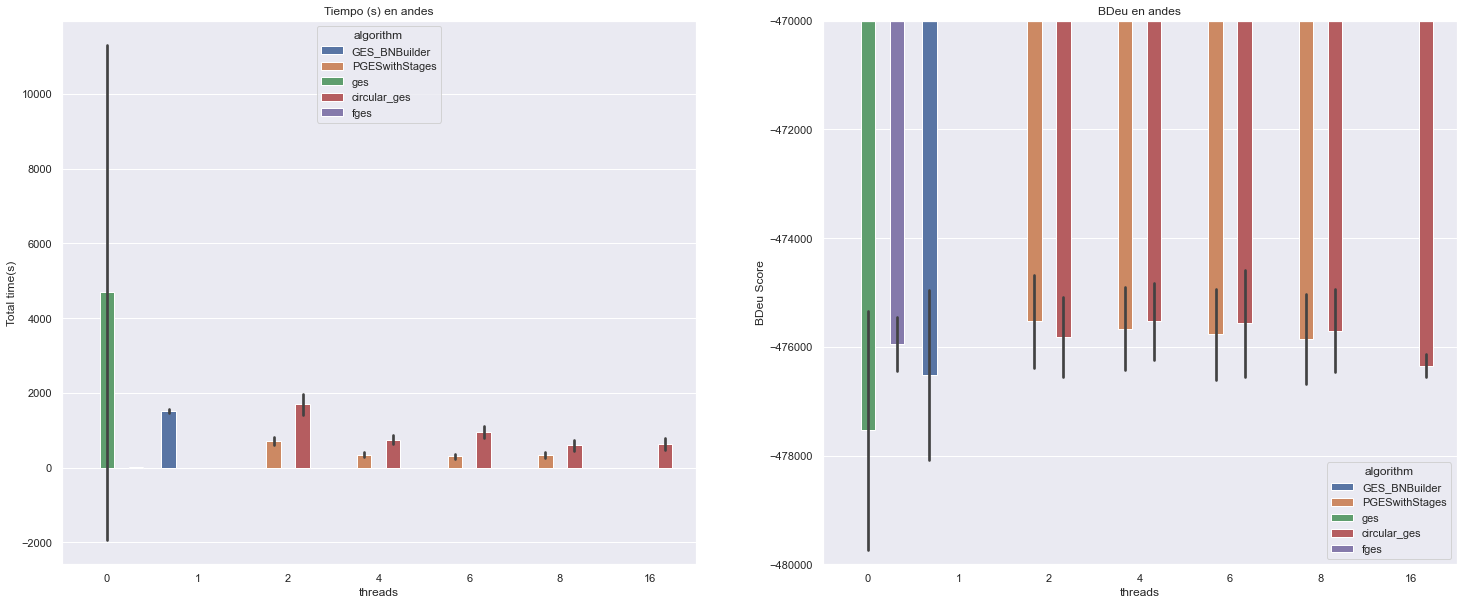

In [202]:
net = "andes"
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df[df["network"] == net], x="threads", y='Total time(s)',hue="algorithm", ax=axs[0], ci='sd')
plt.ylim(-480000,-470000)
sns.barplot(data=df[df["network"] == net], x="threads", y='BDeu Score',hue="algorithm", ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en ' + net)
axs[1].set_title('BDeu en ' + net)

In [215]:
print("Time fges in " +net + ": " + str(df[df["network"] == net].groupby(["algorithm","threads"]).mean()["Total time(s)"].loc["fges"][0]))
print("BDEU Score fges in " +net + ": " + str(df[df["network"] == net].groupby(["algorithm","threads"]).mean()["BDeu Score"].loc["fges"][0]))


Time fges in andes: 8.930636363636363
BDEU Score fges in andes: -475942.02450043155


In [198]:
#sns.barplot(data=df[df["network"] == "andes"], x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

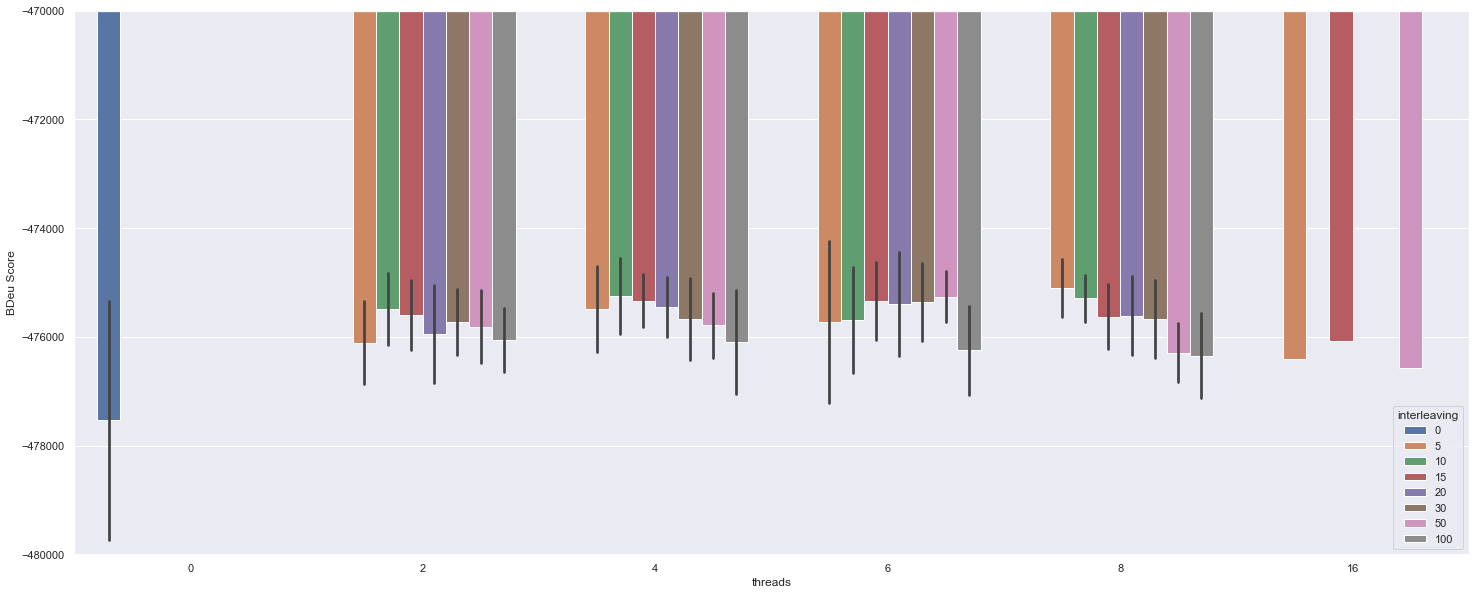

In [21]:
plt.ylim(-480000,-470000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos (0 = GES)')

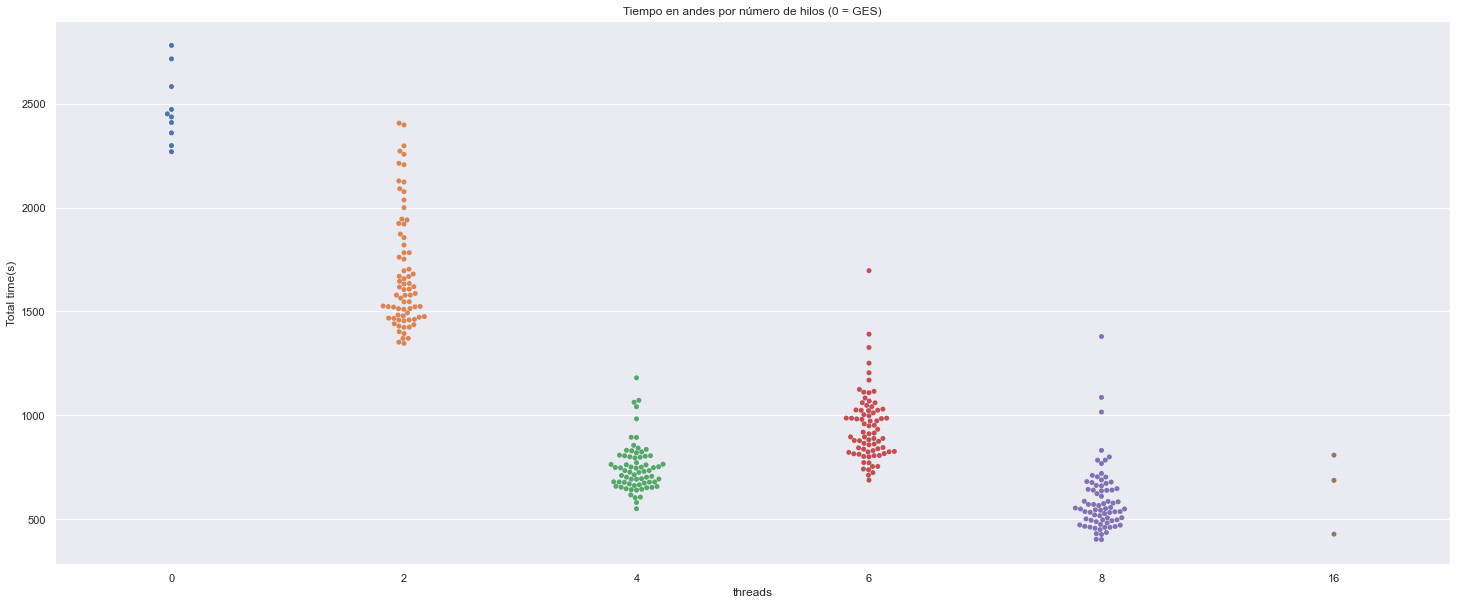

In [23]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en andes por número de hilos (0 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en andes por número de hilos (0 = GES)')

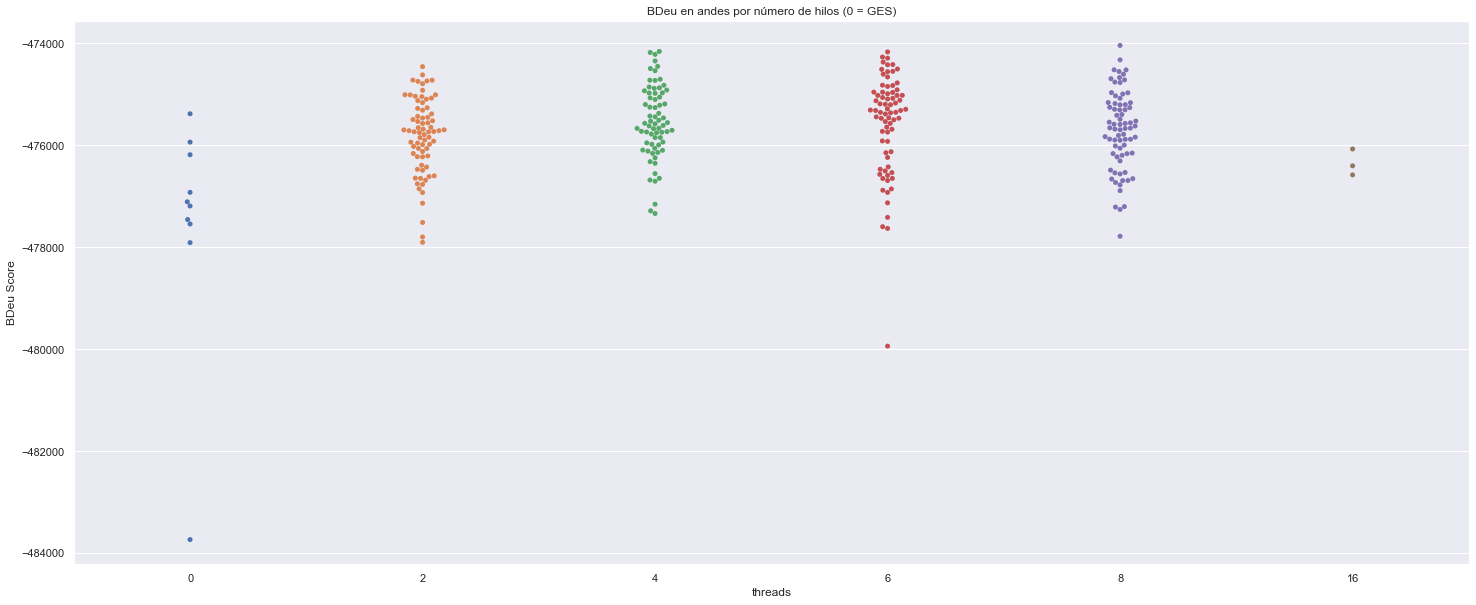

In [19]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en andes por número de hilos (0 = GES)')

### Tiempo de ejecución ``pigs``:

In [29]:
df2 = df[df["network"] == "pigs"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2969,circular_ges,pigs,pigs.xbif50001246_,2,10,20,-1.716191e+06,46.0,38.0,8.0,36,26832.753
2970,circular_ges,pigs,pigs.xbif50001246_,2,15,26,-1.719227e+06,58.0,32.0,26.0,24,27073.549
2971,circular_ges,pigs,pigs.xbif50001246_,2,30,11,-1.713181e+06,26.0,24.0,2.0,20,24664.754
2972,circular_ges,pigs,pigs.xbif50001246_,2,50,15,-1.714828e+06,36.0,32.0,4.0,12,25319.281
2973,circular_ges,pigs,pigs.xbif50001246_,4,10,12,-1.713775e+06,32.0,30.0,2.0,29,10723.885
...,...,...,...,...,...,...,...,...,...,...,...,...
3191,circular_ges,pigs,pigs.xbif_,6,5,4,-1.711266e+06,10.0,6.0,4.0,37,21277.207
3192,circular_ges,pigs,pigs.xbif_,8,10,7,-1.711790e+06,18.0,14.0,4.0,29,7312.315
3193,circular_ges,pigs,pigs.xbif_,8,15,11,-1.713208e+06,32.0,28.0,4.0,22,6292.047
3194,circular_ges,pigs,pigs.xbif_,8,30,12,-1.712827e+06,36.0,32.0,4.0,24,10138.187


Text(0.5, 1.0, 'BDeu en pigs')

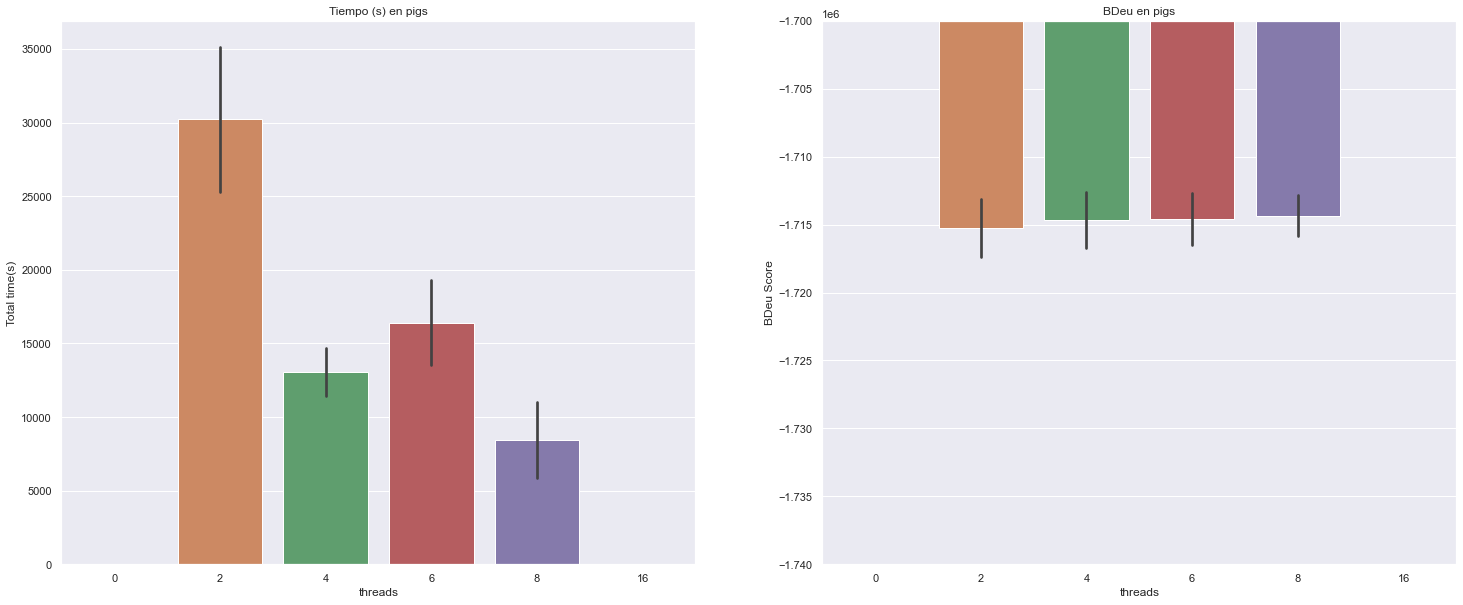

In [30]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1740000,-1700000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en pigs')
axs[1].set_title('BDeu en pigs')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

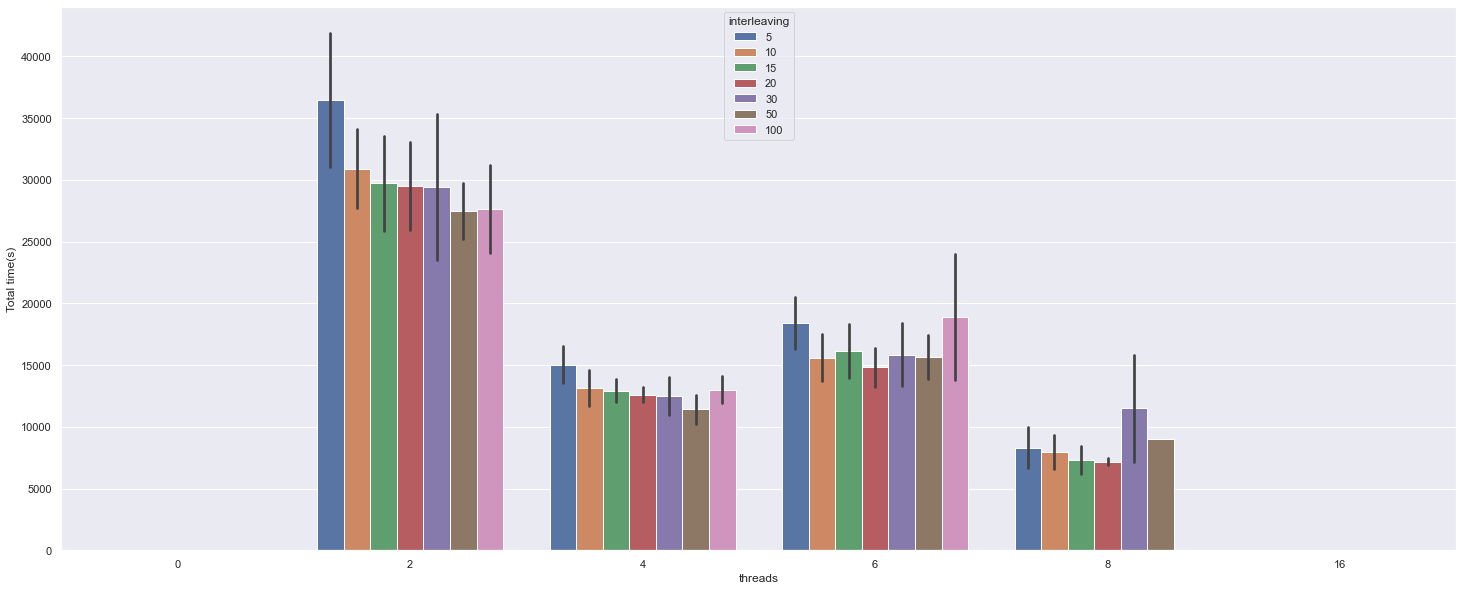

In [31]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

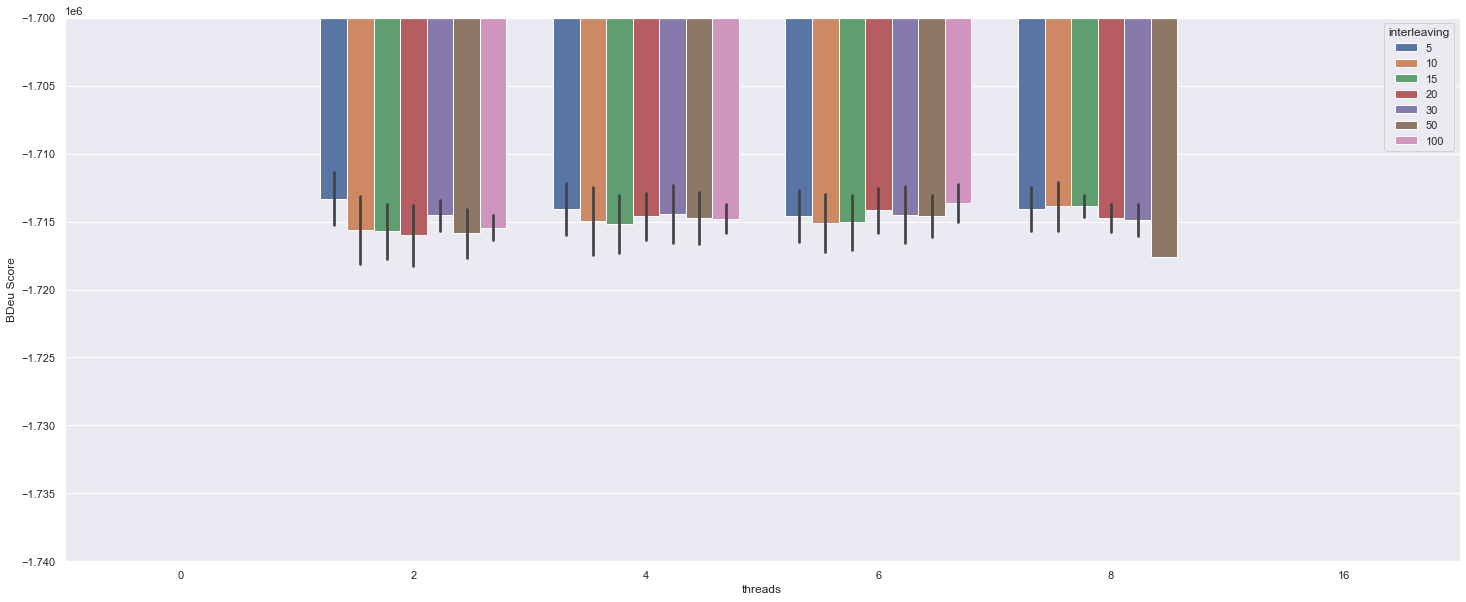

In [32]:
plt.ylim(-1740000,-1700000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en pigs por número de hilos (0 = GES)')

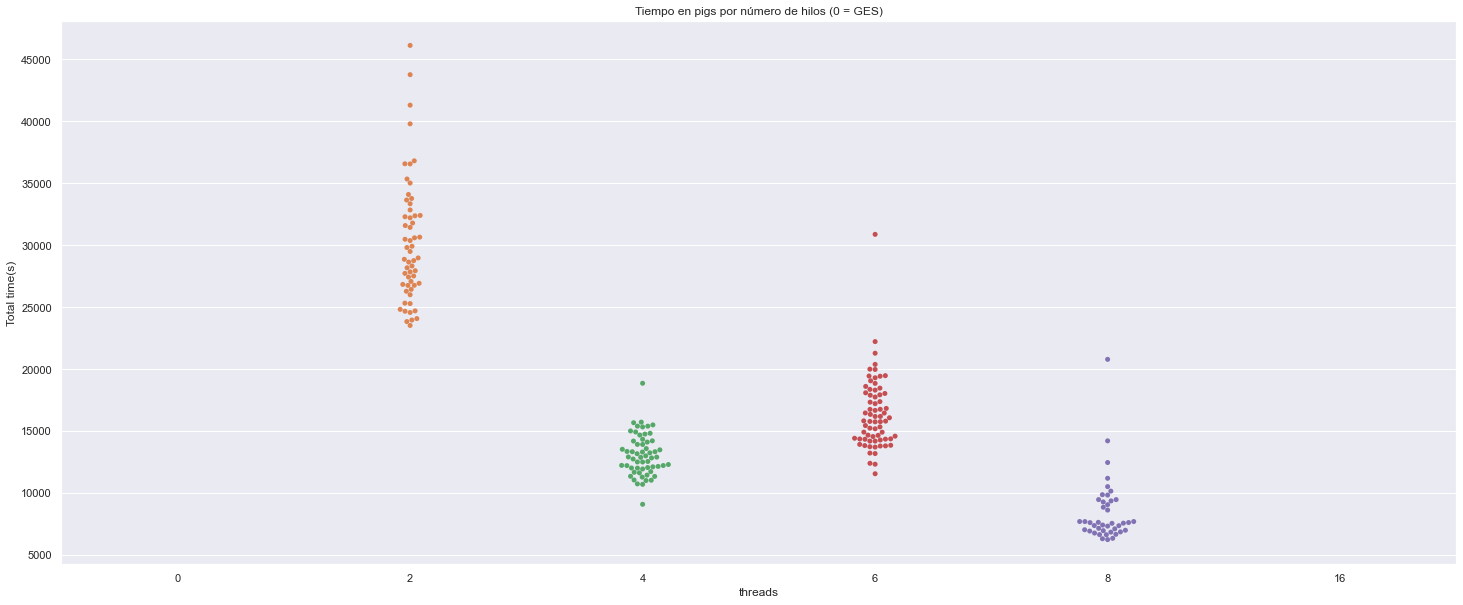

In [33]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en pigs por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en pigs por número de hilos (0 = GES)')

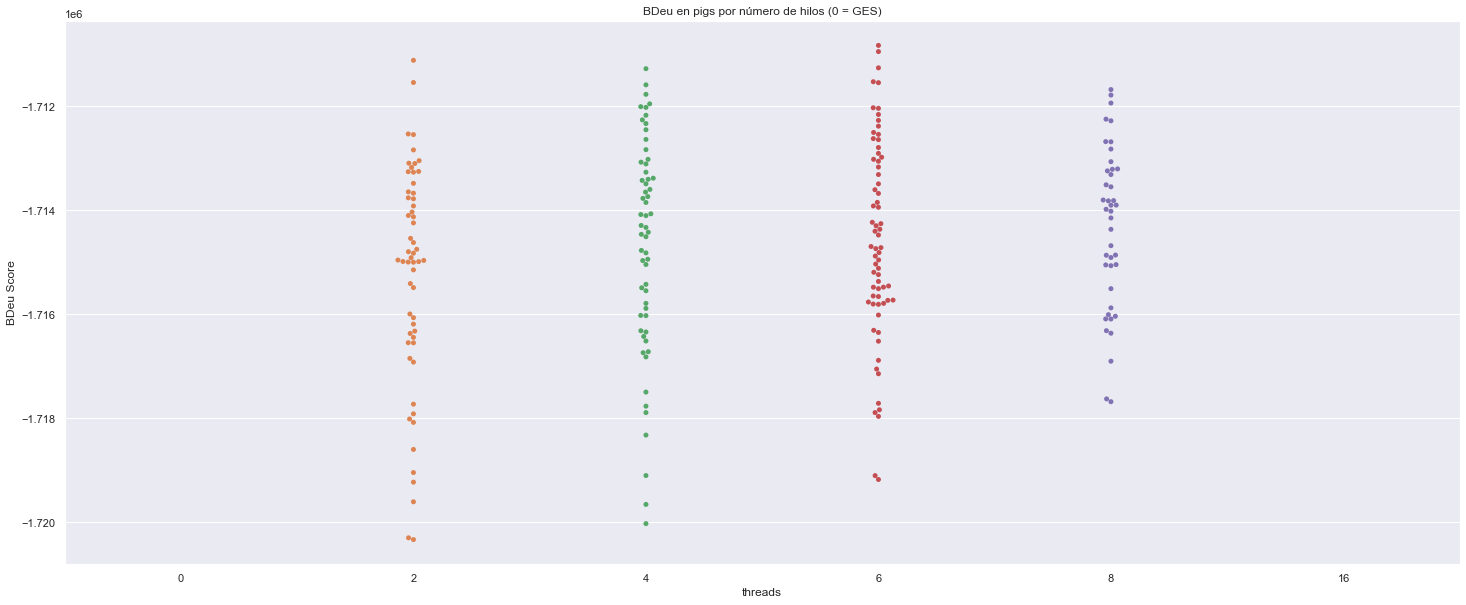

In [24]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en pigs por número de hilos (0 = GES)')

### Tiempo de ejecución ``link``:

In [34]:
df2 = df[df["network"] == "link"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2460,circular_ges,link,link.xbif50001246_,2,10,972,-1.298870e+06,1984.0,544.0,1440.0,52,35010.797
2461,circular_ges,link,link.xbif50001246_,2,15,983,-1.307774e+06,2002.0,560.0,1442.0,36,33988.758
2462,circular_ges,link,link.xbif50001246_,2,30,1006,-1.321093e+06,2070.0,626.0,1444.0,20,33795.751
2463,circular_ges,link,link.xbif50001246_,2,50,1084,-1.347433e+06,2254.0,712.0,1542.0,14,30191.535
2464,circular_ges,link,link.xbif50001246_,4,10,998,-1.329460e+06,2062.0,644.0,1418.0,38,15617.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2652,circular_ges,link,link.xbif_,8,10,964,-1.295936e+06,2012.0,636.0,1376.0,27,7085.501
2653,circular_ges,link,link.xbif_,8,15,956,-1.293216e+06,1974.0,572.0,1402.0,22,7825.062
2654,circular_ges,link,link.xbif_,8,30,1012,-1.296443e+06,2110.0,622.0,1488.0,22,9388.227
2655,circular_ges,link,link.xbif_,8,50,1034,-1.309504e+06,2164.0,624.0,1540.0,42,20951.179


Text(0.5, 1.0, 'BDeu en link')

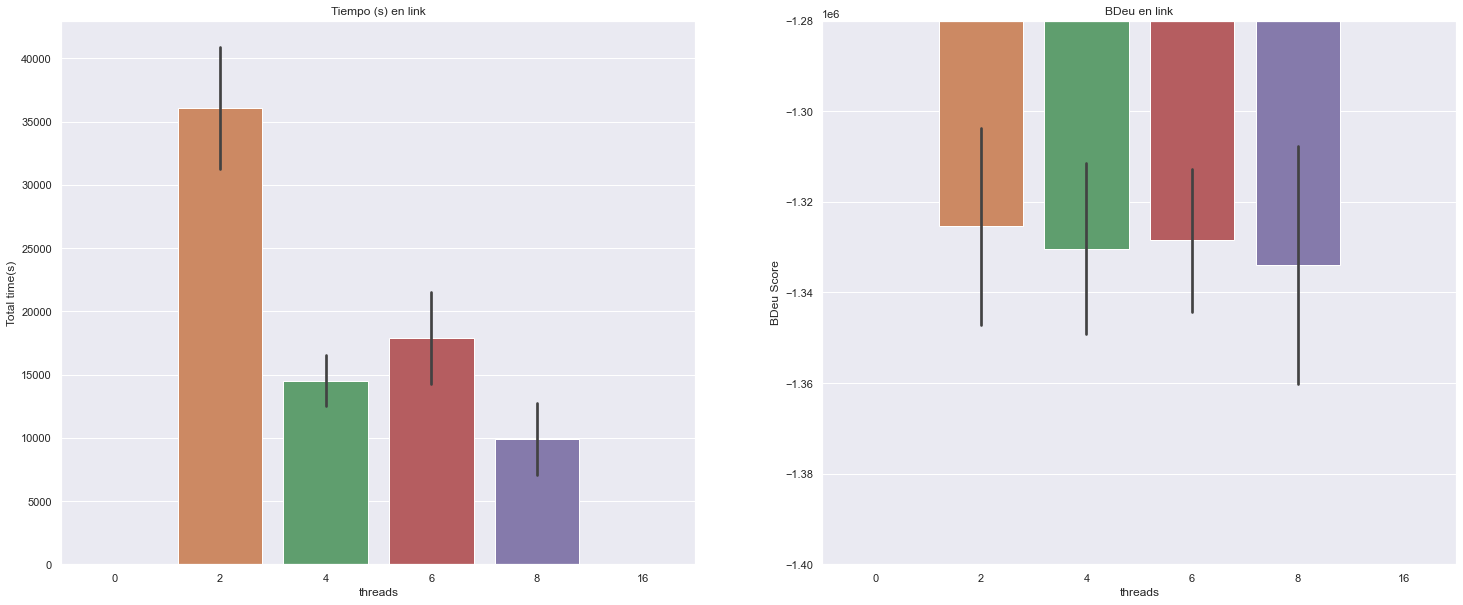

In [35]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1400000,-1280000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en link')
axs[1].set_title('BDeu en link')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

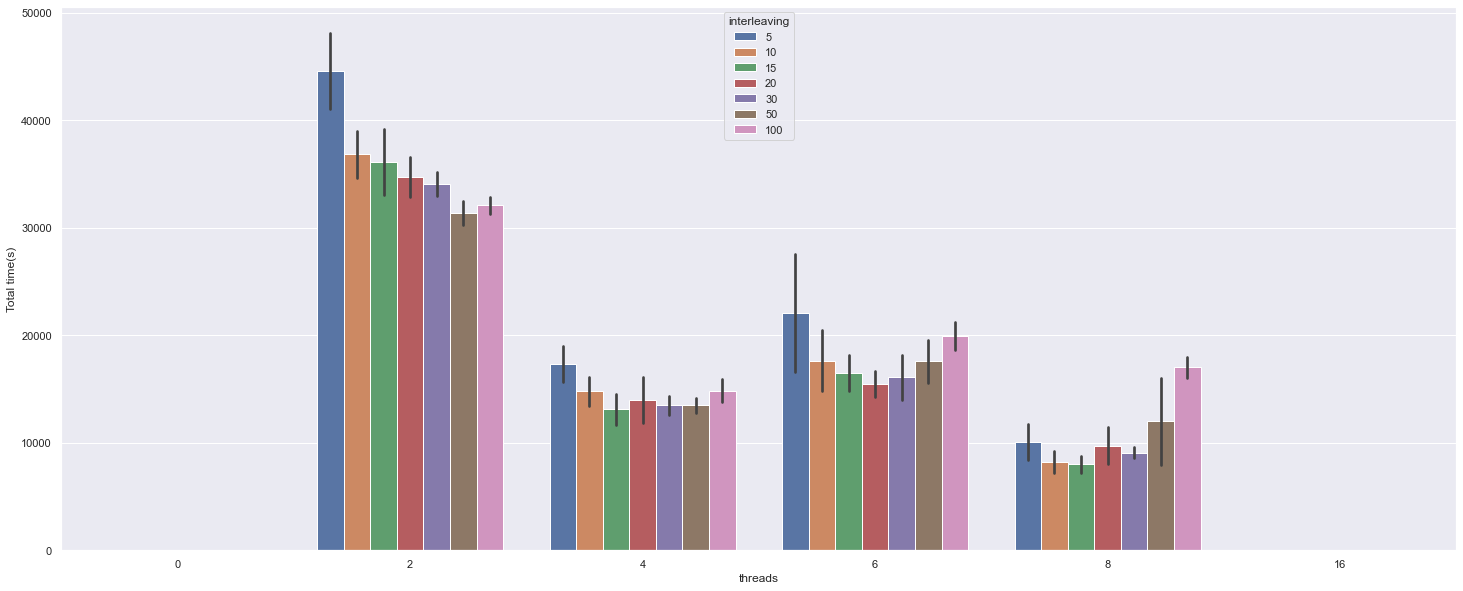

In [36]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

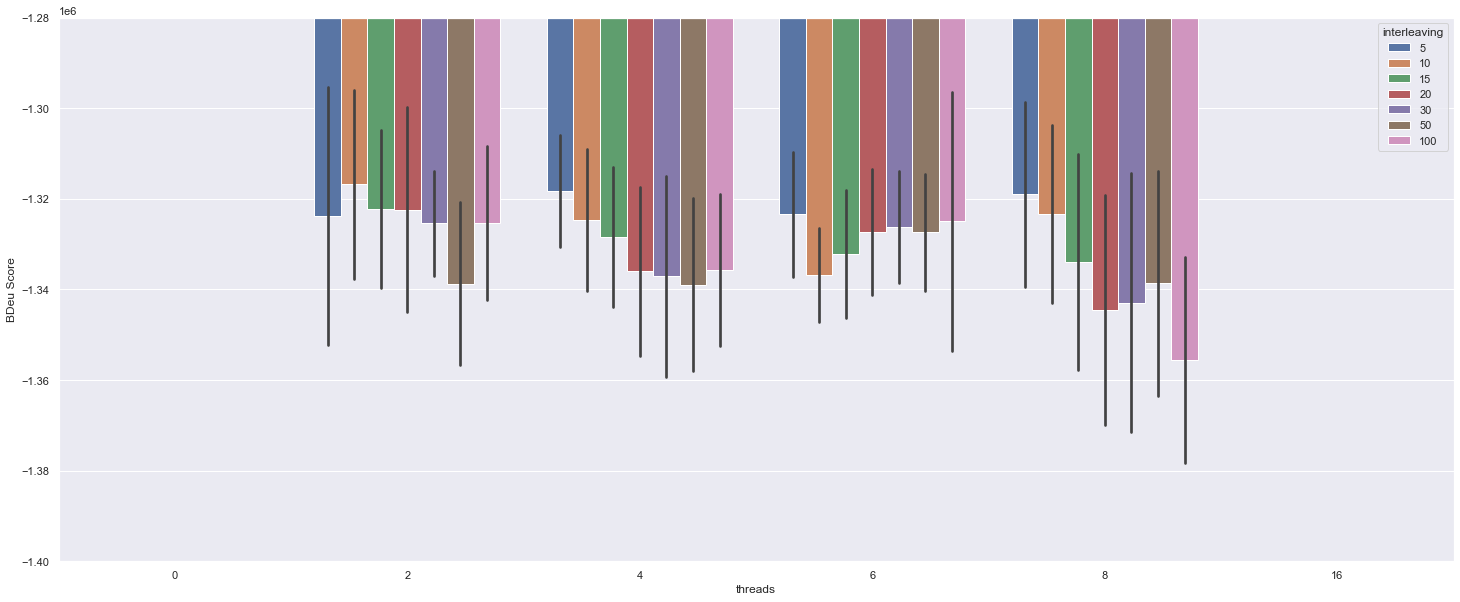

In [37]:
plt.ylim(-1400000,-1280000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en link por número de hilos (0 = GES)')

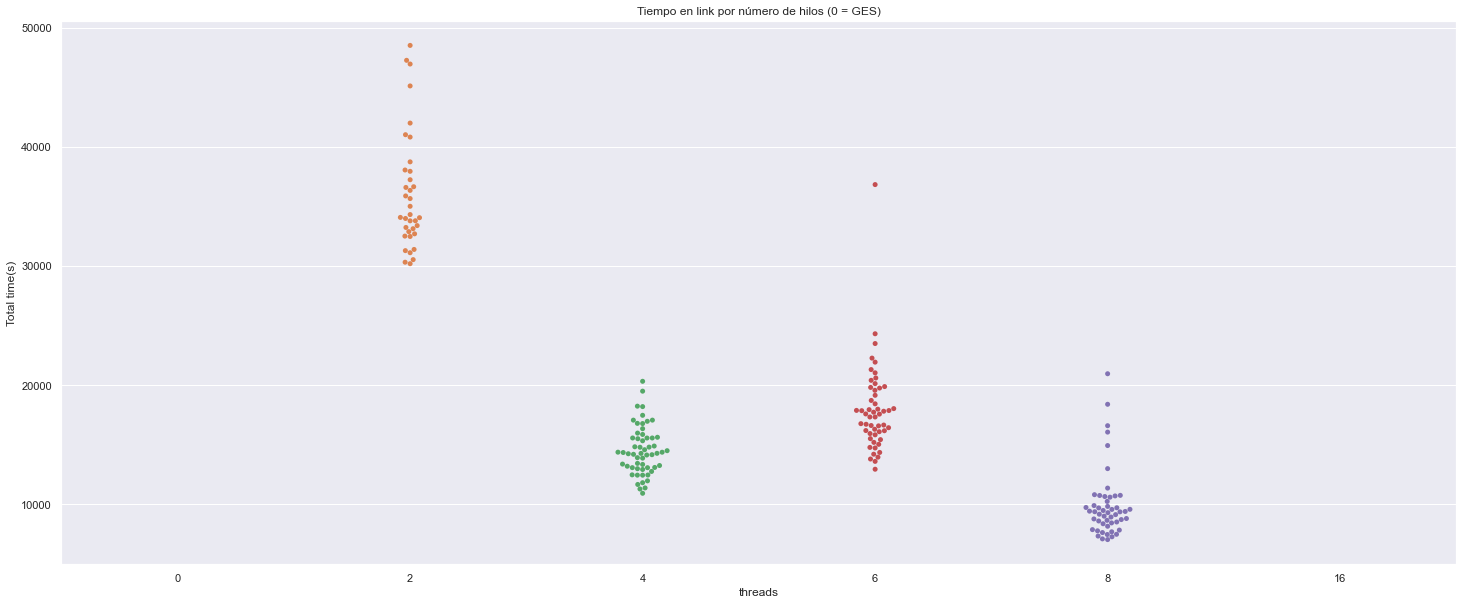

In [35]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en link por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en link por número de hilos (0 = GES)')

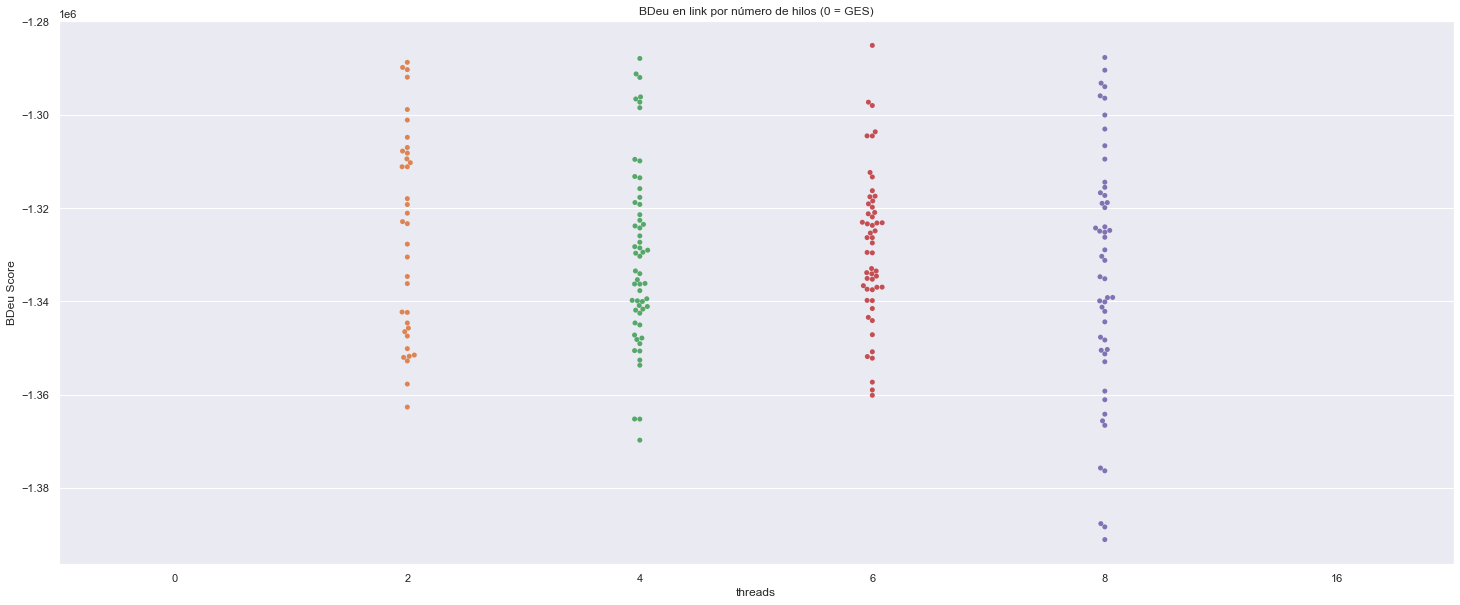

In [36]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en link por número de hilos (0 = GES)')

### Tiempo de ejecución ``win95pts``:

In [38]:
df2 = df[df["network"] == "win95pts"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
3509,ges,win95pts,win95pts.xbif50001246_,0,0,105,-50229.363522,238.0,74.0,164.0,1,92.156
3510,circular_ges,win95pts,win95pts.xbif50001246_,16,30,131,-50187.424898,290.0,94.0,196.0,15,123.184
3511,circular_ges,win95pts,win95pts.xbif50001246_,2,10,125,-49874.020312,276.0,92.0,184.0,10,91.249
3512,circular_ges,win95pts,win95pts.xbif50001246_,2,15,114,-49917.233502,258.0,80.0,178.0,9,88.628
3513,circular_ges,win95pts,win95pts.xbif50001246_,2,20,106,-49947.794280,238.0,68.0,170.0,6,88.673
...,...,...,...,...,...,...,...,...,...,...,...,...
3804,circular_ges,win95pts,win95pts.xbif_,8,15,152,-50704.464740,356.0,144.0,212.0,9,70.634
3805,circular_ges,win95pts,win95pts.xbif_,8,20,110,-50109.798642,246.0,66.0,180.0,13,89.863
3806,circular_ges,win95pts,win95pts.xbif_,8,30,128,-49844.717216,286.0,90.0,196.0,11,81.267
3807,circular_ges,win95pts,win95pts.xbif_,8,50,122,-50193.477648,266.0,90.0,176.0,10,67.547


Text(0.5, 1.0, 'BDeu en win95pts')

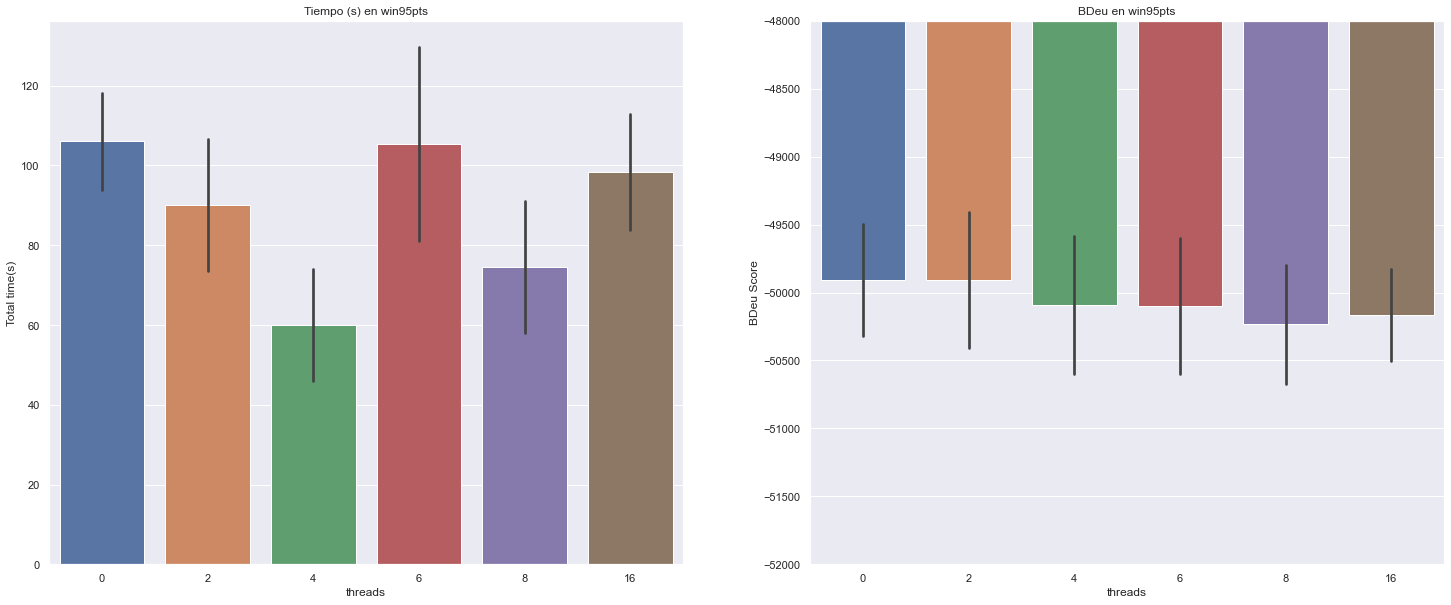

In [39]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en win95pts')
axs[1].set_title('BDeu en win95pts')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

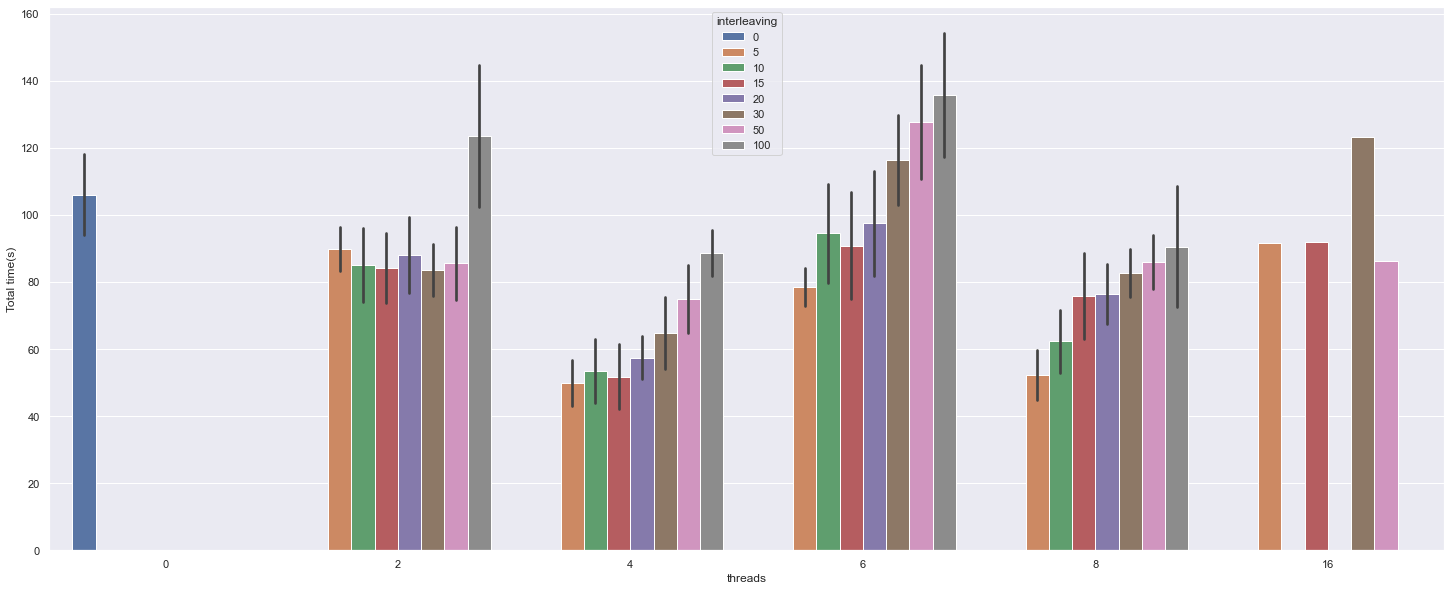

In [40]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

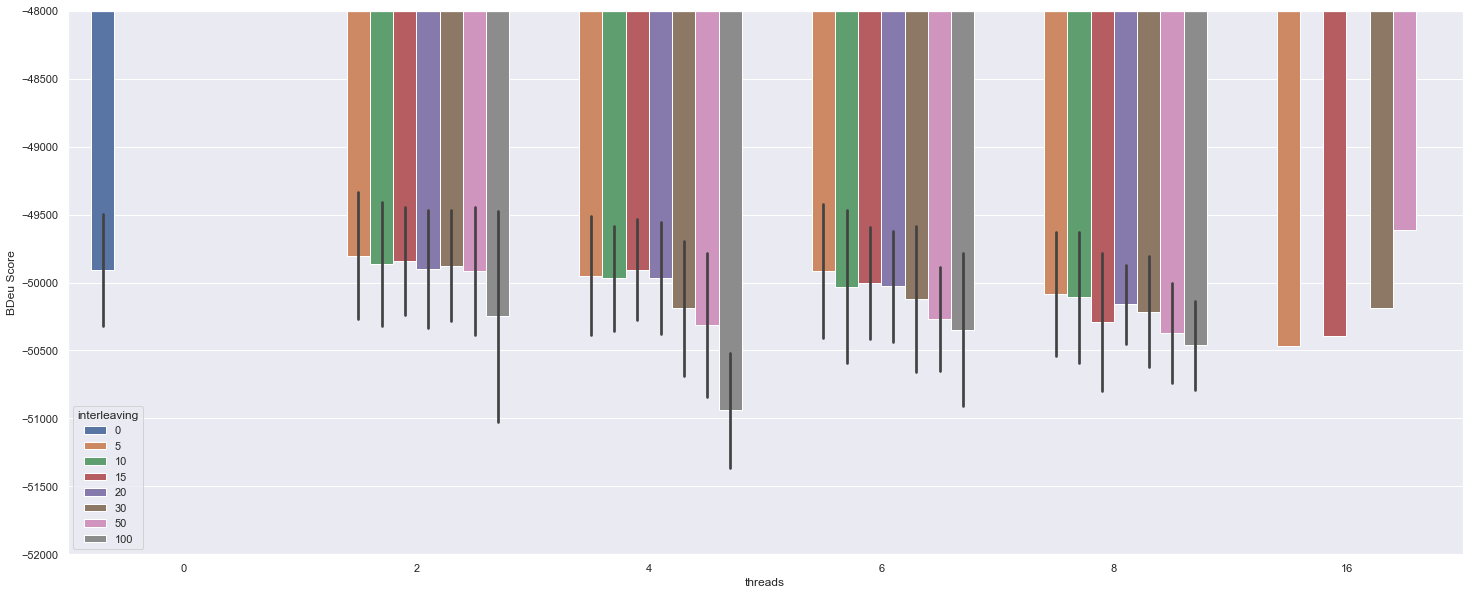

In [41]:
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en win95pts por número de hilos (0 = GES)')

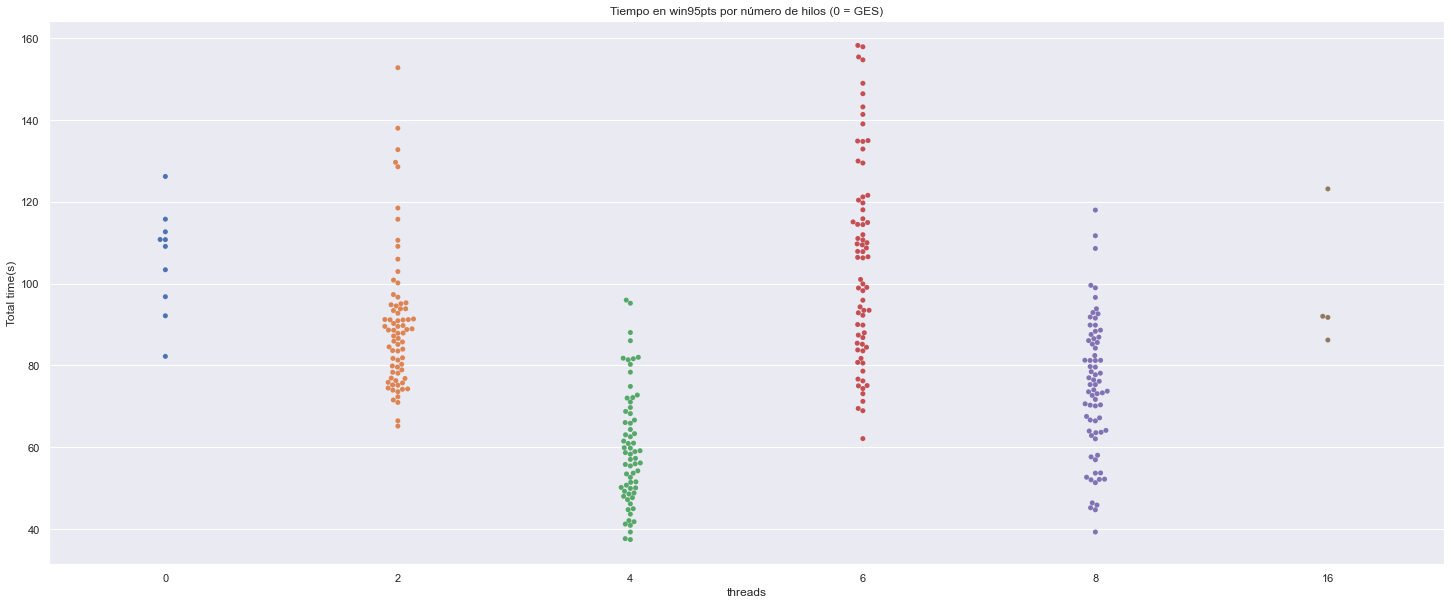

In [42]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en win95pts por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en win95pts por número de hilos (0 = GES)')

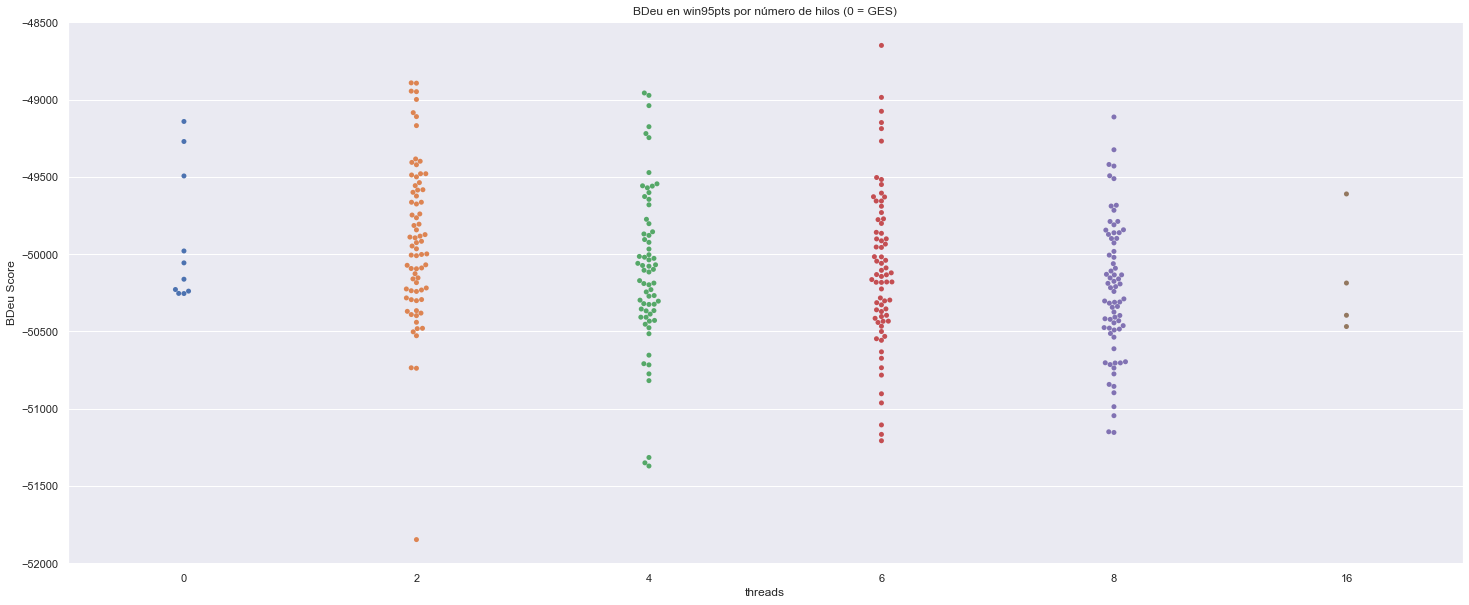

In [43]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en win95pts por número de hilos (0 = GES)')

### Tiempo de ejecución ``alarm``:

In [44]:
df2 = df[df["network"] == "alarm"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,circular_ges,alarm,alarm.xbif50001246_,16,30,19,-57359.080276,44.0,10.0,34.0,16,19.853
1,circular_ges,alarm,alarm.xbif50001246_,2,10,16,-57398.228157,38.0,8.0,30.0,5,8.235
2,circular_ges,alarm,alarm.xbif50001246_,2,15,14,-57028.807106,32.0,4.0,28.0,5,8.104
3,circular_ges,alarm,alarm.xbif50001246_,2,20,16,-57390.295975,38.0,8.0,30.0,4,8.492
4,circular_ges,alarm,alarm.xbif50001246_,2,30,16,-57436.688789,38.0,8.0,30.0,4,9.918
...,...,...,...,...,...,...,...,...,...,...,...,...
303,circular_ges,alarm,alarm.xbif_,8,15,19,-57133.888400,44.0,10.0,34.0,7,8.509
304,circular_ges,alarm,alarm.xbif_,8,20,19,-57427.352941,44.0,8.0,36.0,10,11.014
305,circular_ges,alarm,alarm.xbif_,8,30,19,-57427.352941,44.0,8.0,36.0,10,10.226
306,circular_ges,alarm,alarm.xbif_,8,50,19,-57427.352941,44.0,8.0,36.0,10,11.072


Text(0.5, 1.0, 'BDeu en alarm')

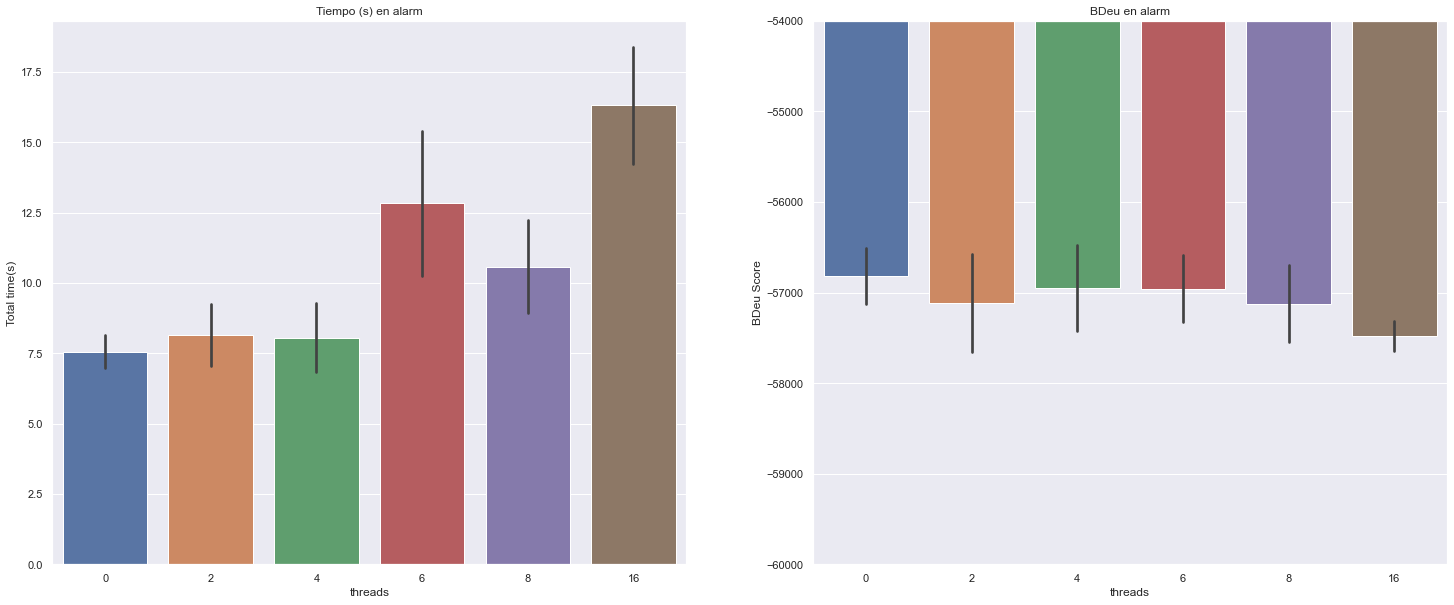

In [52]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-60000,-54000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en alarm')
axs[1].set_title('BDeu en alarm')

<AxesSubplot:xlabel='threads', ylabel='Total time(s)'>

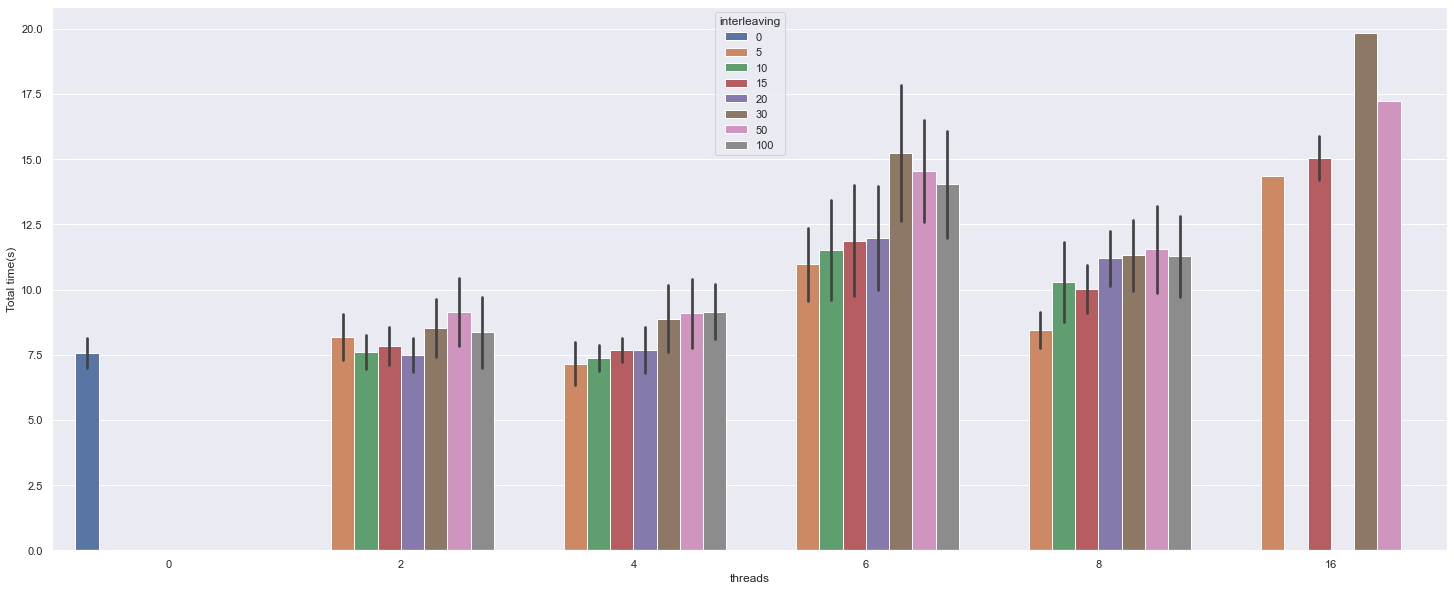

In [46]:
sns.barplot(data=df2, x="threads", y='Total time(s)', hue='interleaving', ci='sd')

<AxesSubplot:xlabel='threads', ylabel='BDeu Score'>

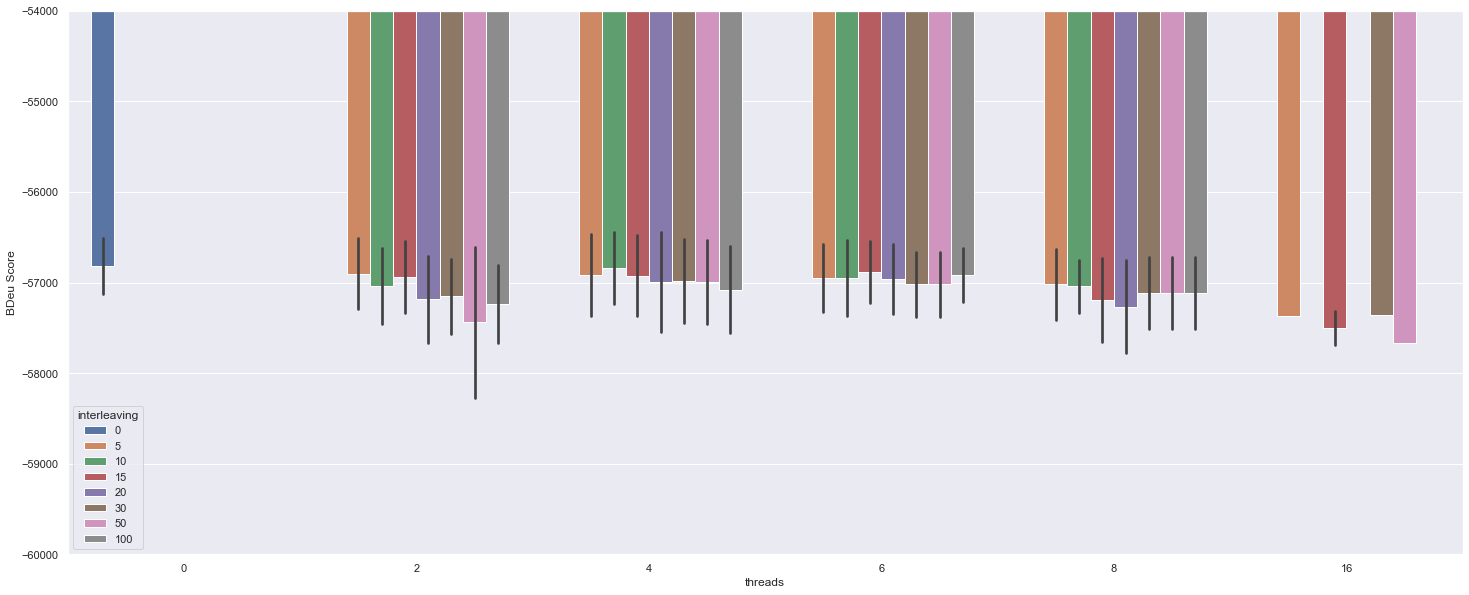

In [53]:
plt.ylim(-60000,-54000)
sns.barplot(data=df2, x="threads", y='BDeu Score', hue='interleaving', ci='sd')

Text(0.5, 1.0, 'Tiempo en alarm por número de hilos (0 = GES)')

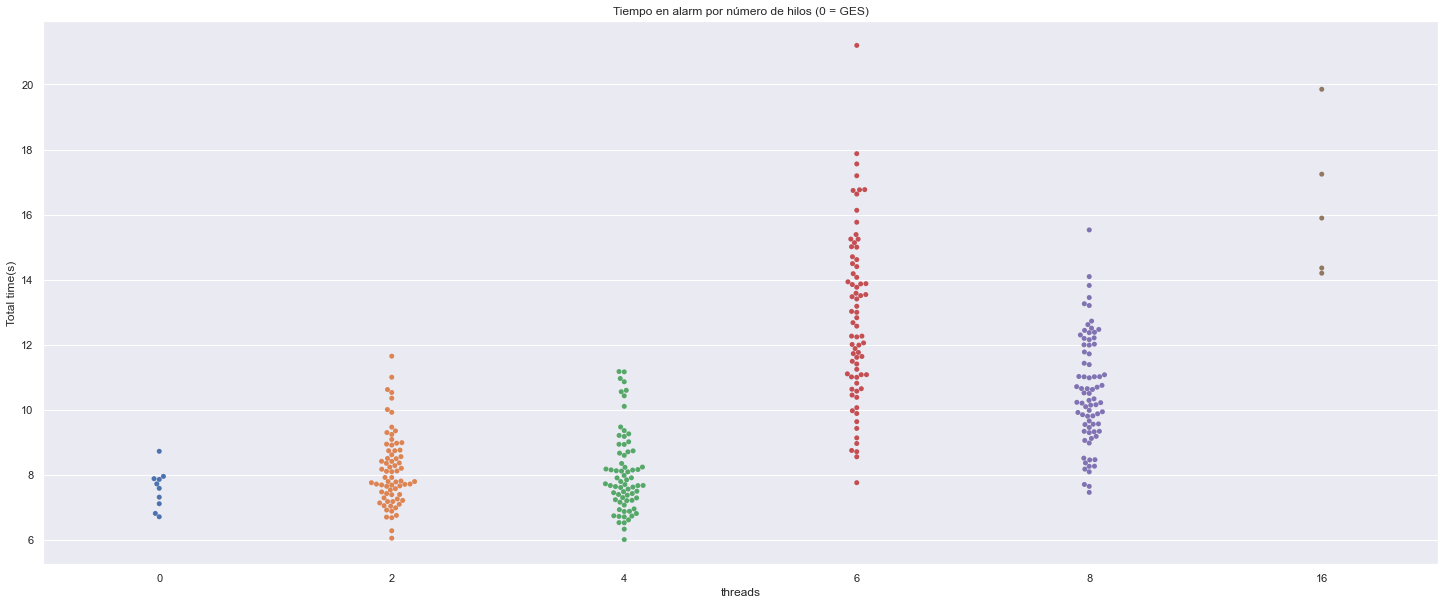

In [48]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en alarm por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en alarm por número de hilos (0 = GES)')

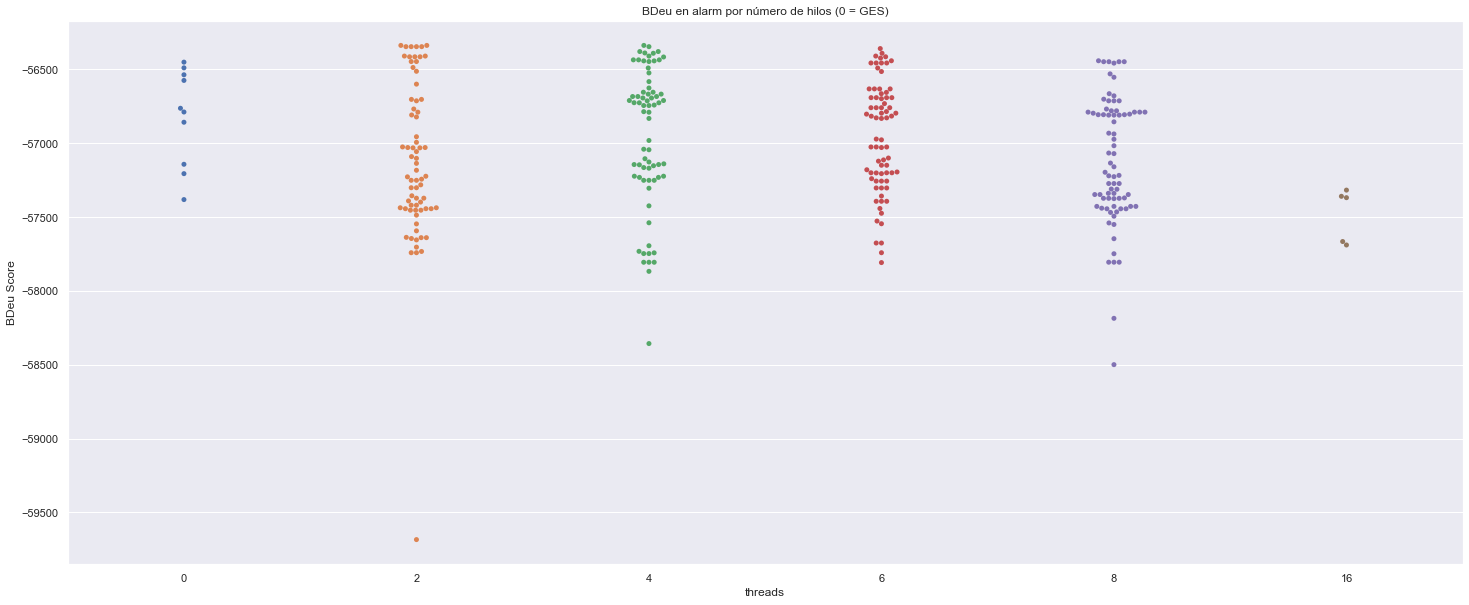

In [49]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en alarm por número de hilos (0 = GES)')